# Only focus on VIP network (Top 10 alters network)

In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import meetup_strategy as ms
import time 
import util
import pickle

In [2]:
checkin_path = 'data/weeplace_checkins.csv'
placeid_path = 'temp_data/wp-150/weeplace_placeidT_150.pickle'
friendship_path = 'data/weeplace_friends.csv'
VIP_network_path = 'final/wp-150/wp_VIP_MeetupNp.csv'

In [3]:
VIP_network = pd.read_csv(VIP_network_path)

In [4]:
# read picle file
pickle_in = open(placeid_path, "rb")
placeidT = pickle.load(pickle_in)
pickle_in.close()

In [11]:
VIP_H_MFN = VIP_network[VIP_network['category'] == 'CB-1H-MFN'][['userid', 'userid_y']]

## H-MFN

In [14]:
VIP_H_MFN.columns = ['userid_x', 'userid_y']

In [15]:
ValidGoodMeetupCV = ms.MeetupCrossValid(checkin_path, mins_records=150, name='wp_H_cv_vip10',freq='H',
                            n_previous=None, user_meetup=None, total_meetup=VIP_H_MFN, placeidT=placeidT)
# N_previous has already appeared in VIP_H_MFN

In [16]:
len(ValidGoodMeetupCV.egolist)

285

In [ ]:
ValidGoodMeetupCV.ego_info(n_shown=False, verbose=True, filesave=True)

4sq-seoul
aaron-cruz
aaron-landry
aaron-rutledge
adam-cohen
adam-fullerton
adam-jackson
adam-ostrow
akshay-dodeja
alastair-green
alex-rainert
alex-white
alexis-dorenter
alli
amber-rae-lambke
ana-h
andrea-rosen
andrei-zmievski
andrew-grill
andrew-mager
andrew-pile
andy-amendola
andy-hadfield
angela-baxley
anita-brooklynbybike-singh
anjelika-paranjpe
anna-frenkel
anthony-dines
anton-volnuhin
ari-greenberg
ben-kessler
ben-parr
ben-roodman
blake-whitman
brady-forrest
brandon-chesnutt
brian-kalma
brian-moore3
brian-papa
brian-stelter
brynn-evans
carla-blumenthal
caroline-mccarthy
carolyn-weiss
cassel-kroll
celsius
chet-gulland
chris-ayres
chris-mccann8
chris-messina7
chris-oleary
christian-hughes
christine-ngo
chuck-masucci
chuck-reynolds
conner-mccall
cooper-smith7
damian-damjanovski
damien-basile
dan-dofter
daniel-newman
danielle-morrill
danny-nathan
darrell-whitelaw
dave-edwards
dave-kerpen
dave-taylor
david-berkowitz
david-lifson
david-rosen
david-trahan
dawn-winchester
dennis-yang
dens

## TFN

In [18]:
VIP_TFN = VIP_network[VIP_network['category'] == 'TFN'][['userid', 'userid_y']]

In [19]:
VIP_TFN.columns = ['userid_x', 'userid_y']

In [20]:
TFN_vip_meetup = ms.MeetupCrossValid(checkin_path, mins_records=150, name='wp_TFN_cv_vip10',freq='H',
                            n_previous=None, user_meetup=None, total_meetup=VIP_TFN, placeidT=placeidT)

In [21]:
len(TFN_vip_meetup.egolist)

285

In [ ]:
TFN_vip_meetup.ego_info(n_shown=False, verbose=True, filesave=True)

4sq-seoul
aaron-cruz
aaron-landry
aaron-rutledge
adam-cohen
adam-fullerton
adam-jackson
adam-ostrow
akshay-dodeja
alastair-green
alex-rainert
alex-white
alexis-dorenter
alli
amber-rae-lambke
ana-h
andrea-rosen
andrei-zmievski
andrew-grill
andrew-mager
andrew-pile
andy-amendola
andy-hadfield
angela-baxley
anita-brooklynbybike-singh
anjelika-paranjpe
anna-frenkel
anthony-dines
anton-volnuhin
ari-greenberg
ben-kessler
ben-parr
ben-roodman
blake-whitman
brady-forrest
brandon-chesnutt
brian-kalma
brian-moore3
brian-papa
brian-stelter
brynn-evans
carla-blumenthal
caroline-mccarthy
carolyn-weiss


# Compare and visualisation

In [38]:
TFN_vip = TFN_vip_meetup.cross_info.copy()
H_MFN_vip = ValidGoodMeetupCV.cross_info.copy()

In [70]:
TFN_vip['category'] = 'TFN'
H_MFN_vip['category'] = 'CB-1H-MFN'

In [71]:
vip_meetup = pd.concat([H_MFN_vip, TFN_vip])

In [75]:
vip_meetup.to_csv('final/wp-150-cv/wp_join_vip10_CV.csv', index=False)

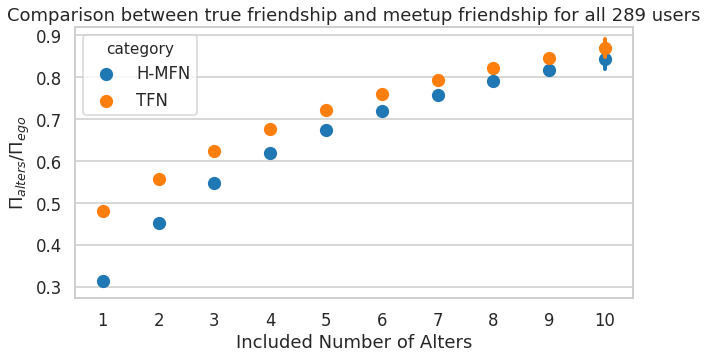

In [68]:
vs.cv_compare_plot(vip_meetup, threshold=10, mode='talk', l=10, w=5, ci=95)